# **Prediction of the purchased category**




## Reading the data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ds_test_applicants_2019.xlsx to ds_test_applicants_2019.xlsx


In [2]:
import io
data = io.BytesIO(uploaded['ds_test_applicants_2019.xlsx'])   
import pandas as pd   
data = pd.read_excel(data , sheet_name = 'training_set', index_col=0)
data.head()

,user_id,bi_category_one,phones_carts,phones_carts_recency,mens_shoes_carts,mens_shoes_carts_recency,tv_audio_video_carts,tv_audio_video_carts_recency,kids_baby_carts,kids_baby_carts_recency,home_carts,home_carts_recency,womens_accessories_carts,womens_accessories_carts_recency,sport_fitness_carts,sport_fitness_carts_recency,beauty_perfumes_carts,beauty_perfumes_carts_recency,mens_clothing_carts,mens_clothing_carts_recency,womens_shoes_carts,womens_shoes_carts_recency,computing_carts,computing_carts_recency,automotive_motorcycles_carts,automotive_motorcycles_carts_recency,appliances_carts,appliances_carts_recency,mens_accessories_carts,mens_accessories_carts_recency,cameras_accessories_carts,cameras_accessories_carts_recency,grocers_shop_carts,grocers_shop_carts_recency,unisexs_accessories_carts,unisexs_accessories_carts_recency,womens_clothing_carts,womens_clothing_carts_recency,boys_carts,boys_carts_recency,...,home_views,home_views_recency,womens_accessories_views,womens_accessories_views_recency,sport_fitness_views,sport_fitness_views_recency,beauty_perfumes_views,beauty_perfumes_views_recency,mens_clothing_views,mens_clothing_views_recency,womens_shoes_views,womens_shoes_views_recency,computing_views,computing_views_recency,automotive_motorcycles_views,automotive_motorcycles_views_recency,appliances_views,appliances_views_recency,mens_accessories_views,mens_accessories_views_recency,cameras_accessories_views,cameras_accessories_views_recency,grocers_shop_views,grocers_shop_views_recency,unisexs_accessories_views,unisexs_accessories_views_recency,womens_clothing_views,womens_clothing_views_recency,boys_views,boys_views_recency,books_stationery_views,books_stationery_views_recency,games_consoles_views,games_consoles_views_recency,girls_views,girls_views_recency,tablets_accessories_views,tablets_accessories_views_recency,events_tickets_views,events_tickets_views_recency
0,1373354,computing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,12,0,0,0,0,7,12,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2413698,womens_accessories,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2570661,mens_clothing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2571711,phones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2571950,womens_shoes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,3,0,0,1,3,8,3,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2,0,0,0,0,0,0,0,0,0,0,0,0


## Data Cleaning and Exploration

In [3]:
#First of all we will remove user_id column as it will not help much in category prediction
data=data.drop(['user_id'], axis=1)
#Now let's explore the shape of the data. 1199 observations means that we don't have too much data to work with
data.shape


(1199, 145)

In [4]:
#Next we will explore the type of the columns and as observed all columns are intergers except one column which is supposed to be our
#target value column bi_category_one but let's confirm
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1198
Columns: 145 entries, bi_category_one to events_tickets_views_recency
dtypes: int64(144), object(1)
memory usage: 1.3+ MB


In [5]:
data['bi_category_one'].dtypes

dtype('O')

In [6]:
#Now we need to check If we have null values in all the data or not and luckily we don't have any
data.isnull().sum().sum()

0

In [7]:
#One important thing is to know number of categories and how much the data equally distributed among the different classes and as 
#we can see the categories isn't equally distributed so using accuracy as a metric will not be great idea also during dividing the data
#into training and validation stratified sampling will be much better .
data['bi_category_one'].nunique()

24

## Preparing the data for ML algortihm

In [0]:
#first we will separate the target and features in 2 dataframes
from sklearn.model_selection import train_test_split
data_features = data.drop("bi_category_one", axis=1)
data_labels = data["bi_category_one"].copy()
#After that we will split the data to training and validation using stratified sampling to try to balance the classes between training
#and validation data
X_train,X_valid, y_train, y_valid = train_test_split(data_features,data_labels, test_size=0.2,random_state=42, stratify=data_labels)

## Model selection

In [9]:
# Using Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Training phase
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Predicting the labels for validation data and output different evaluation metrics
predicted = lr.predict(X_valid)
acc = metrics.accuracy_score(y_valid,predicted)

print ('Accuracy of Logistic Regression is '+str(acc*100)+'%')
print (metrics.classification_report(y_valid,predicted))
#as we can see accuracy, f1 score, precision, recall are all around 22% so let's try another algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic Regression is 22.916666666666664%
                        precision    recall  f1-score   support

            appliances       0.00      0.00      0.00         9
automotive_motorcycles       0.50      0.14      0.22         7
       beauty_perfumes       0.24      0.46      0.32        46
                  boys       0.00      0.00      0.00         2
   cameras_accessories       0.00      0.00      0.00         3
             computing       0.20      0.18      0.19        11
        games_consoles       0.00      0.00      0.00         1
                 girls       0.00      0.00      0.00         1
          grocers_shop       0.00      0.00      0.00         3
                  home       0.18      0.15      0.17        26
             kids_baby       0.00      0.00      0.00         3
      mens_accessories       0.30      0.33      0.32        18
         mens_clothing       0.00      0.00      0.00        10
            mens_shoes       0.44      0.36     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
#Using random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

#Predicting the labels for validation data and output different evaluation metrics
predicted = rf.predict(X_valid)
acc = metrics.accuracy_score(y_valid,predicted)

print ('Accuracy of random forest is '+str(acc*100)+'%')
print (metrics.classification_report(y_valid,predicted))
#as we can see accuracy, f1 score, precision, recall are all enhanced compared to logisitc regression

Accuracy of random forest is 27.500000000000004%
                        precision    recall  f1-score   support

            appliances       0.25      0.11      0.15         9
automotive_motorcycles       0.80      0.57      0.67         7
       beauty_perfumes       0.29      0.67      0.41        46
                  boys       0.00      0.00      0.00         2
   cameras_accessories       0.00      0.00      0.00         3
             computing       0.00      0.00      0.00        11
        games_consoles       0.00      0.00      0.00         1
                 girls       0.00      0.00      0.00         1
          grocers_shop       0.00      0.00      0.00         3
                  home       0.23      0.31      0.26        26
             kids_baby       0.00      0.00      0.00         3
      mens_accessories       0.08      0.06      0.07        18
         mens_clothing       0.25      0.10      0.14        10
            mens_shoes       0.44      0.36      0.40 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
#Now let's try linear SVM
from sklearn.svm import SVC

lsvm = SVC(kernel='linear')
lsvm.fit(X_train, y_train)

#Predicting the labels for validation data and output different evaluation metrics 
predicted = lsvm.predict(X_valid)
acc = metrics.accuracy_score(y_valid,predicted)

print ('Accuracy of linear SVM is '+str(acc*100)+'%')
print (metrics.classification_report(y_valid,predicted))
#linear SVM doesn't perform well

Accuracy of linear SVM is 20.416666666666668%
                        precision    recall  f1-score   support

            appliances       0.14      0.11      0.12         9
automotive_motorcycles       0.33      0.29      0.31         7
       beauty_perfumes       0.19      0.22      0.20        46
      books_stationery       0.00      0.00      0.00         0
                  boys       0.00      0.00      0.00         2
   cameras_accessories       0.00      0.00      0.00         3
             computing       0.40      0.18      0.25        11
        games_consoles       0.00      0.00      0.00         1
                 girls       0.00      0.00      0.00         1
          grocers_shop       0.00      0.00      0.00         3
                  home       0.18      0.19      0.19        26
             kids_baby       0.00      0.00      0.00         3
      mens_accessories       0.33      0.22      0.27        18
         mens_clothing       0.20      0.10      0.13    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [12]:
#Let's try to use SVC with rbf kernel(non linear)
from sklearn.svm import SVC

rbf = SVC()
rbf.fit(X_train, y_train)

#Predicting the labels for validation data and output different evaluation metrics
predicted = rbf.predict(X_valid)
acc = metrics.accuracy_score(y_valid,predicted)

print ('Accuracy of Kernel SVM is '+str(acc*100)+'%')
print (metrics.classification_report(y_valid,predicted))
#very poor accuracy, preciosn, recall and F1-score actually for 'rbf' kernel SVM

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of linear SVM is 17.916666666666668%
                        precision    recall  f1-score   support

            appliances       0.00      0.00      0.00         9
automotive_motorcycles       0.00      0.00      0.00         7
       beauty_perfumes       0.18      0.76      0.30        46
                  boys       0.00      0.00      0.00         2
   cameras_accessories       0.00      0.00      0.00         3
             computing       0.00      0.00      0.00        11
        games_consoles       0.00      0.00      0.00         1
                 girls       0.00      0.00      0.00         1
          grocers_shop       0.00      0.00      0.00         3
                  home       0.08      0.04      0.05        26
             kids_baby       0.00      0.00      0.00         3
      mens_accessories       0.14      0.06      0.08        18
         mens_clothing       0.00      0.00      0.00        10
            mens_shoes       0.00      0.00      0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 959 samples, validate on 240 samples
Epoch 1/30
959/959 [==============================] - 0s 166us/sample - loss: 9.7754 - acc: 0.0876 - val_loss: 4.6698 - val_acc: 0.1292
Epoch 2/30
959/959 [==============================] - 0s 72us/sample - loss: 5.8195 - acc: 0.1439 - val_loss: 3.8672 - val_acc: 0.1167
Epoch 3/30
959/959 [==============================] - 0s 70us/sample - loss: 4.8153 - acc: 0.1439 - val_loss: 3.5511 - val_acc: 0.1583
Epoch 4/30
959/959 [==============================] - 0s 75us/sample - loss: 4.1655 - acc: 0.1804 - val_loss: 3.3297 - val_acc: 0.1792
Epoch 5/30
959/959 [==============================] - 0s 72us/sample - loss: 3.7269 - acc: 0.1950 - val_loss: 3.2418 - val_acc: 0.1625
Epoch 6/30
959/959 [==============================] - 0s 66us/sample - loss: 3.4819 - acc: 0.1877 - val_loss: 3.1572 - val_acc: 0.1750
Epoch 7/30
959/959 [==============================] - 0s 63us/sample - loss: 3.1683 - acc: 0.2357 - val_loss: 3.1146 - val_acc: 0.1750
Epoch 8/

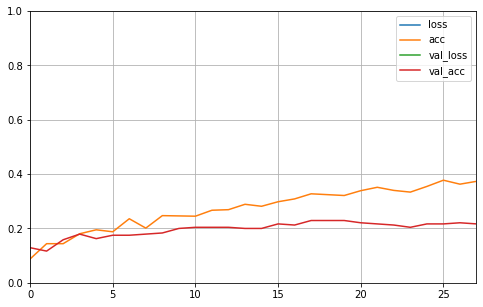

In [14]:
#Now I'll try DNN although I don't expect much as provided data is small

#loading libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

#First we need to make one-hot encoding by using label encoding first to convert categories to labels then making the hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_valid_enc = le.transform(y_valid)

#One hot encoding with 24 classes
y_train_hot = to_categorical(y_train_enc, num_classes=24)
y_valid_hot = to_categorical(y_valid_enc, num_classes=24)

#building a model
DNN_model = keras.models.Sequential()
DNN_model.add(keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal",input_shape=(144,))) 
DNN_model.add(keras.layers.Dropout(rate=0.3))
DNN_model.add(keras.layers.Dense(50, activation="relu",kernel_initializer="he_normal")) 
#We have 24 different classes so number of output neurons should be 24
DNN_model.add(keras.layers.Dense(24, activation="softmax")) 

DNN_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = DNN_model.fit(X_train, y_train_hot, epochs=30,validation_data=(X_valid, y_valid_hot),callbacks=[keras.callbacks.EarlyStopping(patience=5)]) 

#plotting graph
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

#From the below results remarkable overfitting can be noticed although dropout layer was added to relieve the overfitting also we tried to
#add more layers and change number of neurons on layers without noticable improvement

In [0]:
# We will use rf but we need to try dimensionality reduction and feature scaling

## Fine tuning the best classifier

In [46]:
# From the above results it is clear that random forest outputs better results than other algorithms so now let's use random forest
# but first we will make features scaling, dimensionlaity reduction and check whether the result will be improved.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=50)),
			('clf', RandomForestClassifier(n_estimators=100, random_state=0))])

pipe_rf.fit(X_train, y_train)

#Predicting the labels for validation data and output different evaluation metrics 
predicted = pipe_rf.predict(X_valid)
acc = metrics.accuracy_score(y_valid,predicted)

print ('Accuracy of random forest with PCA and feature scaling is '+str(acc*100)+'%')
print (metrics.classification_report(y_valid,predicted))
#as we can see accuracy, f1 score, precision, recall didn't enhance after adding feature scaling and PCA although I changed
#n_components for many values but for always the value is remrakabely less than plain random forest so as a last experiment we
#will use grid search to try different combination of n_componenets and number of rf trees and see the result


Accuracy of random forest with PCA and feature scaling is 22.083333333333332%
                        precision    recall  f1-score   support

            appliances       0.25      0.11      0.15         9
automotive_motorcycles       0.50      0.14      0.22         7
       beauty_perfumes       0.21      0.61      0.31        46
                  boys       0.00      0.00      0.00         2
   cameras_accessories       0.00      0.00      0.00         3
             computing       0.20      0.09      0.13        11
        games_consoles       0.00      0.00      0.00         1
                 girls       0.00      0.00      0.00         1
          grocers_shop       0.00      0.00      0.00         3
                  home       0.21      0.23      0.22        26
             kids_baby       0.00      0.00      0.00         3
      mens_accessories       0.25      0.11      0.15        18
         mens_clothing       0.00      0.00      0.00        10
            mens_shoes   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
#Using Gridsearch to output the best values noting that we chose number of PCA components and number of rf trees for the search
from sklearn.model_selection import GridSearchCV

pipe_grid = Pipeline([('scl', StandardScaler()),
			('pca', PCA()),
			('clf', RandomForestClassifier(random_state=0))])

search_space = [
                {'pca__n_components': [5,10,20,40,60,80]},
                {'clf__n_estimators': [10,20,40,60,80,100,120]}
               ]
#We will select F1 score to be the score by which gridsearch will decide which is the best model and will define only 5 folds
#As data isn't too large and identifying much folds can cause some overfitting
scorer = metrics.make_scorer(metrics.f1_score, average = 'weighted')
grid_rf = GridSearchCV(pipe_grid, search_space, cv=5, verbose=0, scoring=scorer)
grid_rf.fit(X_train, y_train)
#As there are some classes with very few observations(sometimes just 2) it is normal to see the below warnings

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sk

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                        

In [43]:
# Checking the best weighted F1-score for gridsearch
grid_rf.best_score_

0.1518828502715725

From the above results it is better to use Random Forest classifier with 100 trees and without PCA

## Reading and cleaning test data

In [50]:
#First we will read test data
data = io.BytesIO(uploaded['ds_test_applicants_2019.xlsx']) 
test = pd.read_excel(data , sheet_name = 'testing_set', index_col=0)
test.head()

,user_id,bi_category_one,phones_carts,phones_carts_recency,mens_shoes_carts,mens_shoes_carts_recency,tv_audio_video_carts,tv_audio_video_carts_recency,kids_baby_carts,kids_baby_carts_recency,home_carts,home_carts_recency,womens_accessories_carts,womens_accessories_carts_recency,sport_fitness_carts,sport_fitness_carts_recency,beauty_perfumes_carts,beauty_perfumes_carts_recency,mens_clothing_carts,mens_clothing_carts_recency,womens_shoes_carts,womens_shoes_carts_recency,computing_carts,computing_carts_recency,automotive_motorcycles_carts,automotive_motorcycles_carts_recency,appliances_carts,appliances_carts_recency,mens_accessories_carts,mens_accessories_carts_recency,cameras_accessories_carts,cameras_accessories_carts_recency,grocers_shop_carts,grocers_shop_carts_recency,unisexs_accessories_carts,unisexs_accessories_carts_recency,womens_clothing_carts,womens_clothing_carts_recency,boys_carts,boys_carts_recency,...,home_views,home_views_recency,womens_accessories_views,womens_accessories_views_recency,sport_fitness_views,sport_fitness_views_recency,beauty_perfumes_views,beauty_perfumes_views_recency,mens_clothing_views,mens_clothing_views_recency,womens_shoes_views,womens_shoes_views_recency,computing_views,computing_views_recency,automotive_motorcycles_views,automotive_motorcycles_views_recency,appliances_views,appliances_views_recency,mens_accessories_views,mens_accessories_views_recency,cameras_accessories_views,cameras_accessories_views_recency,grocers_shop_views,grocers_shop_views_recency,unisexs_accessories_views,unisexs_accessories_views_recency,womens_clothing_views,womens_clothing_views_recency,boys_views,boys_views_recency,books_stationery_views,books_stationery_views_recency,games_consoles_views,games_consoles_views_recency,girls_views,girls_views_recency,tablets_accessories_views,tablets_accessories_views_recency,events_tickets_views,events_tickets_views_recency
1199,2513641,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,9,4,1,1,9,40,1,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
1200,2513887,?,1,3,9,1,2,5,5,4,0,0,0,0,0,0,0,0,6,14,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,21,18,...,2,4,0,0,0,0,4,9,32,2,7,2,0,0,0,0,1,2,12,2,0,0,0,0,4,3,3,9,47,5,0,0,0,0,20,1,0,0,0,0
1201,2515180,?,0,0,0,0,0,0,3,1,1,16,0,0,0,0,1,16,0,0,5,18,0,0,0,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,...,16,4,4,1,0,0,2,1,4,2,5,9,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,3,0,0,0,0,0,0,3,5,0,0,0,0
1202,2515823,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,0,16,1,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1203,2516834,?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,17,...,2,5,0,0,0,0,0,0,2,3,19,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,0,0,0,0,28,5,0,0,0,0


In [53]:
#Next we will remove user_id column and bi_category_one column
X_test = test.drop(["bi_category_one","user_id"], axis=1)
X_test

,phones_carts,phones_carts_recency,mens_shoes_carts,mens_shoes_carts_recency,tv_audio_video_carts,tv_audio_video_carts_recency,kids_baby_carts,kids_baby_carts_recency,home_carts,home_carts_recency,womens_accessories_carts,womens_accessories_carts_recency,sport_fitness_carts,sport_fitness_carts_recency,beauty_perfumes_carts,beauty_perfumes_carts_recency,mens_clothing_carts,mens_clothing_carts_recency,womens_shoes_carts,womens_shoes_carts_recency,computing_carts,computing_carts_recency,automotive_motorcycles_carts,automotive_motorcycles_carts_recency,appliances_carts,appliances_carts_recency,mens_accessories_carts,mens_accessories_carts_recency,cameras_accessories_carts,cameras_accessories_carts_recency,grocers_shop_carts,grocers_shop_carts_recency,unisexs_accessories_carts,unisexs_accessories_carts_recency,womens_clothing_carts,womens_clothing_carts_recency,boys_carts,boys_carts_recency,books_stationery_carts,books_stationery_carts_recency,...,home_views,home_views_recency,womens_accessories_views,womens_accessories_views_recency,sport_fitness_views,sport_fitness_views_recency,beauty_perfumes_views,beauty_perfumes_views_recency,mens_clothing_views,mens_clothing_views_recency,womens_shoes_views,womens_shoes_views_recency,computing_views,computing_views_recency,automotive_motorcycles_views,automotive_motorcycles_views_recency,appliances_views,appliances_views_recency,mens_accessories_views,mens_accessories_views_recency,cameras_accessories_views,cameras_accessories_views_recency,grocers_shop_views,grocers_shop_views_recency,unisexs_accessories_views,unisexs_accessories_views_recency,womens_clothing_views,womens_clothing_views_recency,boys_views,boys_views_recency,books_stationery_views,books_stationery_views_recency,games_consoles_views,games_consoles_views_recency,girls_views,girls_views_recency,tablets_accessories_views,tablets_accessories_views_recency,events_tickets_views,events_tickets_views_recency
1199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,9,4,1,1,9,40,1,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
1200,1,3,9,1,2,5,5,4,0,0,0,0,0,0,0,0,6,14,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,21,18,0,0,...,2,4,0,0,0,0,4,9,32,2,7,2,0,0,0,0,1,2,12,2,0,0,0,0,4,3,3,9,47,5,0,0,0,0,20,1,0,0,0,0
1201,0,0,0,0,0,0,3,1,1,16,0,0,0,0,1,16,0,0,5,18,0,0,0,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,4,4,1,0,0,2,1,4,2,5,9,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,3,0,0,0,0,0,0,3,5,0,0,0,0
1202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,0,16,1,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,17,0,0,...,2,5,0,0,0,0,0,0,2,3,19,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,0,0,0,0,28,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1,30,45,18,1,18,0,0,1,5,1,19,2,37,2,2,10,4,12,18,1,41,1,9,1,6,1,19,0,0,3,9,1,6,6,4,0,0,0,0,...,1,2,1,12,2,4,7,2,103,4,2,4,0,0,1,6,7,6,0,0,0,0,3,9,8,6,13,4,24,9,0,0,0,0,0,0,0,0,0,0
1438,1,30,45,18,1,18,0,0,1,5,1,19,2,37,2,2,10,4,12,18,1,41,1,9,1,6,1,19,0,0,3,9,1,6,6,4,0,0,0,0,...,1,2,1,12,2,4,7,2,103,4,2,4,0,0,1,6,7,6,0,0,0,0,3,9,8,6,13,4,24,9,0,0,0,0,0,0,0,0,0,0
1439,1,30,45,18,1,18,0,0,1,5,1,19,2,37,2,2,10,4,12,18,1,41,1,9,1,6,1,19,0,0,3,9,1,6,6,4,0,0,0,0,...,1,2,1,12,2,4,7,2,103,4,2,4,0,0,1,6,7,6,0,0,0,0,3,9,8,6,13,4,24,9,0,0,0,0,0,0,0,0,0,0
1440,1,30,45,18,1,18,0,0,1,5,1,19,2,37,2,2,10,4,12,18,1,41,1,9,1,6,1,19,0,0,3,9,1,6,6,4,0,0,0,0,...,1,2,1,12,2,4,7,2,103,4,2,4,0,0,1,6,7,6,0,0,0,0,3,9,8,6,13,4,24,9,0,0,0,0,0,0,0,0,0,0


## Predicting testing data

In [0]:
# As mentioned above we will use random forest to predict teting_data classes
test_predictions = rf.predict(X_test)

In [56]:
#This is the output of our predictions
test_predictions

array(['mens_clothing', 'mens_accessories', 'beauty_perfumes',
       'beauty_perfumes', 'beauty_perfumes', 'beauty_perfumes',
       'mens_shoes', 'mens_shoes', 'phones', 'beauty_perfumes', 'phones',
       'beauty_perfumes', 'home', 'home', 'womens_shoes', 'home',
       'beauty_perfumes', 'beauty_perfumes', 'computing', 'mens_clothing',
       'beauty_perfumes', 'beauty_perfumes', 'beauty_perfumes',
       'beauty_perfumes', 'mens_accessories', 'home', 'beauty_perfumes',
       'beauty_perfumes', 'home', 'mens_clothing', 'beauty_perfumes',
       'phones', 'phones', 'phones', 'grocers_shop', 'phones',
       'mens_clothing', 'beauty_perfumes', 'home', 'beauty_perfumes',
       'beauty_perfumes', 'beauty_perfumes', 'beauty_perfumes', 'phones',
       'beauty_perfumes', 'beauty_perfumes', 'home', 'home',
       'beauty_perfumes', 'mens_clothing', 'womens_shoes', 'womens_shoes',
       'mens_clothing', 'mens_accessories', 'tv_audio_video',
       'mens_clothing', 'mens_clothing', 'mens

In [0]:
pd.DataFrame(test_predictions).to_csv("predictions.csv")

## Conclusion

* I was able to predict the purchase category based on the training data using Random Forest Classifier
* The F1-score and accuracy values weren't impressive because of the small amount of training data.
* Compared to number of features and number of classes we need much more data to output better results.



